<a href="https://colab.research.google.com/github/paritoshtripathi935/Mias_Breast_cancer_detection/blob/main/paritosh_MIASNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To speed the execution procces, Colaboraty has an option to use GPU. This option is selected by default.

MIAS dataset

In [ ]:
!wget "https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0" -O mias.zip
!unzip mias.zip

--2021-10-17 13:58:14--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download&authuser=0
Resolving drive.google.com (drive.google.com)... 142.250.152.100, 142.250.152.102, 142.250.152.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.152.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download [following]
--2021-10-17 13:58:14--  https://drive.google.com/uc?id=1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sfib673318k1olge17790e92ueftrqu7/1634479050000/05147614325801676241/*/1ZApIHn-EvoQ6sdgJWhgfM3rmEEXWvXRJ?e=download [following]
--2021-10-17 13:58:18--  https://doc-0g-3s-docs.googleusercontent.com/docs/secu

In case that FrImCla is not installed in your system, the first task consist in installing using pip.

In [ ]:
!pip3 install frimcla

In [ ]:
!pip install pandas==0.25.1

In [ ]:
!pip install h5py==2.10.0  

We need some libraries to execute this framework and obtain the results. 

In [ ]:
%tensorflow_version 1.x
from frimcla.index_features import generateFeatures
from frimcla.StatisticalComparison import statisticalComparison, majorityVoting
from frimcla.train import train
from frimcla.prediction import prediction,predictionEnsemble


TensorFlow 1.x selected.


Using TensorFlow backend.
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
Could not import submodules (exact error was: numpy.core.multiarray failed to import).

There are many reasons for this error the most common one is that you have
either not built the packages or have built (using `python setup.py build`) or
installed them (using `python setup.py install`) and then proceeded to test
mahotas **without changing the current directory**.

Try installing and then changing to another directory before importing mahotas.


### Configuring the variables of the program

First of all, we have to indicate the variables that the program need such as the path of the dataset, the models you want to use,...

In [ ]:
datasetPath = "./Mias"
outputPath = "./output"
# featureExtractors = [["inception", "False"]]
batchSize = 32 
verbose = 1
# modelClassifiers = [ "MLP","SVM","KNN"] #You can use MLP, SVM, KNN , LogisticRegression or RandomForest
measure = "f1" #You can use accuracy, f1, auroc, precision or recall 
trainingSize = 1
nSteps=10


In the next section we have to select the feature extractors that we want to use (It is mandatory to **select at least one option**)

In [ ]:
VGG16 = True #@param {type:"boolean"}
VGG19 = True #@param {type:"boolean"}
ResNet = True #@param {type:"boolean"}
Inception = True #@param {type:"boolean"}
GoogleNet = False #@param {type:"boolean"}
Overfeat = False #@param {type:"boolean"}
Xception = True #@param {type:"boolean"}
Densenet = False #@param {type:"boolean"}
LAB888 = False #@param {type:"boolean"}
LAB444 = False #@param {type:"boolean"}
HSV888 = False #@param {type:"boolean"}
HSV444 = False #@param {type:"boolean"}
Haralick = False #@param {type:"boolean"}
Hog = False #@param {type:"boolean"}
Haarhog = False #@param {type:"boolean"}

featureExtractors = []

if VGG19 :
  featureExtractors.append(["vgg19","False"])
if VGG16 :
  featureExtractors.append(["vgg16","False"])
if ResNet :
  featureExtractors.append(["resnet","False"])
if Inception :
  featureExtractors.append(["inception","False"])
if GoogleNet :
  featureExtractors.append(["googlenet"])
if Overfeat :
  featureExtractors.append(["overfeat","[-3]"])
if Xception :
  featureExtractors.append(["xception","False"])
if Densenet :
  featureExtractors.append(["densenet"])
if LAB888 :
  featureExtractors.append(["lab888"])
if LAB444 :
  featureExtractors.append(["lab444","4,4,4"])
if HSV888 :
  featureExtractors.append(["hsv888"])
if HSV444 :
  featureExtractors.append(["hsv444","4,4,4"])
if Haralick :
  featureExtractors.append(["haralick"])
if Hog :
  featureExtractors.append(["hog"])
if Haarhog :
  featureExtractors.append(["haarhog"])

Now we have to indicate the classifier models that we want to use (It is mandatory to **select at least one option**)

In [ ]:
MLP = True #@param {type:"boolean"}
SVM = True #@param {type:"boolean"}
KNN = True #@param {type:"boolean"}
LogisticRegression = True #@param {type:"boolean"}
GradientBoost = True #@param {type:"boolean"}
RandomForest = True #@param {type:"boolean"}

modelClassifiers = []


if MLP :
  modelClassifiers.append("MLP")
if SVM :
  modelClassifiers.append("SVM")
if KNN :
  modelClassifiers.append("KNN")
if LogisticRegression :
  modelClassifiers.append("LogisticRegression")
if GradientBoost :
  modelClassifiers.append("GradientBoost")
if RandomForest :
  modelClassifiers.append("RandomForest")

### Generating the features

At this step we stored the features of each image of the dataset. These features depend on the model used at this moment because each model stores different features of the image. 

In [ ]:
generateFeatures(outputPath, batchSize, datasetPath, featureExtractors, verbose)

[INFO] encoding labels...
[INFO] initializing network...
These features (vgg19) are already generated
[INFO] initializing network...
These features (vgg16) are already generated
[INFO] initializing network...
These features (resnet) are already generated
[INFO] initializing network...
These features (inception) are already generated
[INFO] initializing network...
These features (xception) are already generated


0.015961647033691406

### Statistical analysis

Now with the features of all the images of each model we can perform a statistical analysis to know which of this models has the best performace.

In [ ]:
%matplotlib inline

In [ ]:
!pip install matplotlib

['vgg19', 'False']
MLP
SVM
KNN
LogisticRegression
GradientBoost
RandomForest
-------------------------------------------------
Statistical Analysis
-------------------------------------------------
Iteration 0


/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
./output/Mias/results/kfold-comparison_vgg19.csv
['vgg19_MLP' 'vgg19_SVM' 'vgg19_KNN' 'vgg19_LogisticRegression'
 'vgg19_GradientBoost' 'vgg19_RandomForest']
Report
**********************************************************
Mean and std
**********************************************************
vgg19_MLP: 0.893318 (0.031396)
vgg19_SVM: 0.916491 (0.037119)
vgg19_KNN: 0.892976 (0.050630)
vgg19_LogisticRegression: 0.908398 (0.047653)
vgg19_GradientBoost: 0.907400 (0.052878)
vgg19_RandomForest: 0.905011 (0.043522)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Conditions for a parametric test are fulfilled
-------------------------------------------

/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
./output/Mias/results/kfold-comparison_vgg16.csv
['vgg16_MLP' 'vgg16_SVM' 'vgg16_KNN' 'vgg16_LogisticRegression'
 'vgg16_GradientBoost' 'vgg16_RandomForest']
Report
**********************************************************
Mean and std
**********************************************************
vgg16_MLP: 0.891987 (0.068046)
vgg16_SVM: 0.895740 (0.059539)
vgg16_KNN: 0.893903 (0.039008)
vgg16_LogisticRegression: 0.906491 (0.057123)
vgg16_GradientBoost: 0.885349 (0.050098)
vgg16_RandomForest: 0.904803 (0.044417)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-------

/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
./output/Mias/results/kfold-comparison_resnet.csv
['resnet_MLP' 'resnet_SVM' 'resnet_KNN' 'resnet_LogisticRegression'
 'resnet_GradientBoost' 'resnet_RandomForest']
Report
**********************************************************
Mean and std
**********************************************************
resnet_MLP: 0.920448 (0.021913)
resnet_SVM: 0.927633 (0.031376)
resnet_KNN: 0.901868 (0.053045)
resnet_LogisticRegression: 0.909996 (0.037666)
resnet_GradientBoost: 0.904880 (0.038985)
resnet_RandomForest: 0.895269 (0.032836)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Conditions for a parametric test are fulfilled
------------------

/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
./output/Mias/results/kfold-comparison_inception.csv
['inception_MLP' 'inception_SVM' 'inception_KNN'
 'inception_LogisticRegression' 'inception_GradientBoost'
 'inception_RandomForest']
Report
**********************************************************
Mean and std
**********************************************************
inception_MLP: 0.884044 (0.052112)
inception_SVM: 0.926149 (0.043622)
inception_KNN: 0.838313 (0.055936)
inception_LogisticRegression: 0.921975 (0.047425)
inception_GradientBoost: 0.900999 (0.047613)
inception_RandomForest: 0.889475 (0.047157)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Conditions for a parametr

/usr/local/lib/python3.7/dist-packages/frimcla/Comparing.py:188: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
./output/Mias/results/kfold-comparison_xception.csv
['xception_MLP' 'xception_SVM' 'xception_KNN'
 'xception_LogisticRegression' 'xception_GradientBoost'
 'xception_RandomForest']
Report
**********************************************************
Mean and std
**********************************************************
xception_MLP: 0.914980 (0.045679)
xception_SVM: 0.917381 (0.040699)
xception_KNN: 0.897111 (0.057043)
xception_LogisticRegression: 0.918128 (0.044939)
xception_GradientBoost: 0.924921 (0.053911)
xception_RandomForest: 0.903814 (0.047745)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Conditions for a parametric test are not fulfilled

2696.2916131019592

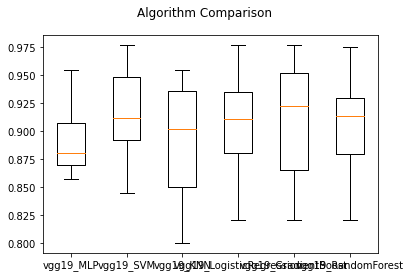

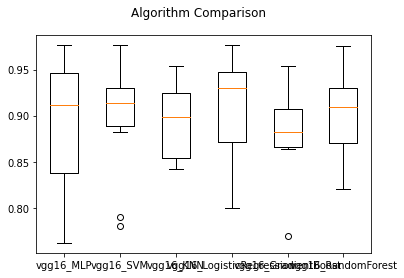

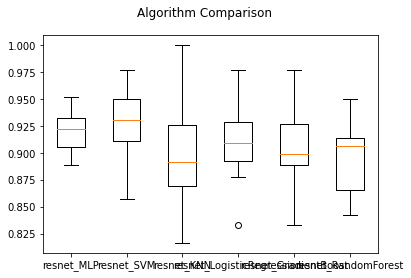

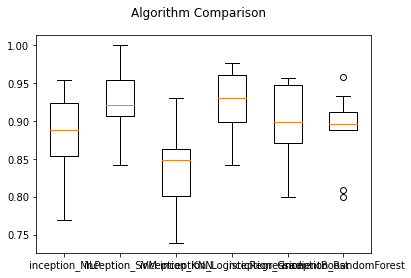

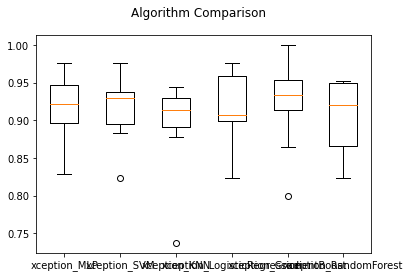

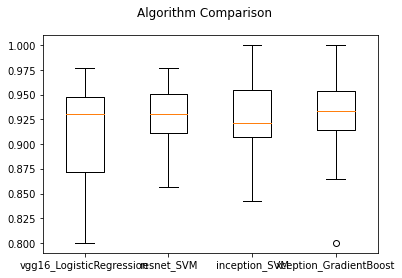

In [ ]:
statisticalComparison(outputPath, datasetPath, featureExtractors, modelClassifiers, measure, nSteps, verbose)

### Train the model

The study gives us as result the best model and indicates if there are significant differences between this and the rest of the models. With this information, we can train the best model and return as a result of the framework to the user.

In this function FrImCla asks the user if he/she wants a web application or not (Y if the user wants the webapp). This web application uses the best model selected by FrImCla for this problem. The application generated is very simple and only contains a text box and a button to predict the class of new images. FrImCla generates a zip file that must be decompressed to be used. Inside the folder the user has to open a new terminal in this path and run the following command:

`python3 FlaskApp/app.py`

The comand executes the web application in http://localhost:5000/ To use the application the user has to write open the link in his/her browser.

In [ ]:
train(outputPath, datasetPath, trainingSize)

[INFO] gathering train/test splits...
[INFO] tuning hyperparameters...


/usr/local/lib/python3.7/dist-packages/frimcla/train.py:52: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  db = h5py.File(featuresPath)


[INFO] best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'C': 1000}
[INFO] dumping classifier...
Do you want to generate a web app to classify the images with the best combination? y/n
N


2.4321036338806152

### Predict the class of the images

Finally, we have the best model and we can use it to predict the class of our images. To do this we have to use the following command and we have to define the feature extractor and the classifier.

In [ ]:
import json

In [ ]:
datasetName = datasetPath[datasetPath.rfind("/")+1:]

with open("./output/" + datasetName +'/ConfModel.json') as data:
    datos = json.load(data)

extractors = datos["featureExtractors"]
classifiers = ["GradientBoost","RandomForest", "SVM","KNN","LogisticRegression", "MLP"]

imagePaths = "./Mias/NORMAL"
predictionEnsemble(featureExtractors, classifiers, imagePaths, "./output", datasetName)

[INFO] loading ['vgg19', 'False']...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[INFO] loading ['vgg16', 'False']...
[INFO] loading ['resnet', 'False']...
[INFO] loading ['inception', 'False']...

[INFO] loading ['xception', 'False']...
[INFO] class predicted for the image ./Mias/NORMAL/mdb052.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb084.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb038.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb047.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb297.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb029.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb235.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb254.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb291.jpg: NORMAL
[INFO] class predicted for the image ./Mias/NORMAL/mdb131.jpg: NORMAL
[INFO] class predicted 

[array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['NORMAL'], dtype='<U8'),
 array(['N

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
!cat output/Mias/predictionResults.csv

image_id, Mias
./Mias/NORMAL/mdb052.jpg, NORMAL
./Mias/NORMAL/mdb084.jpg, NORMAL
./Mias/NORMAL/mdb038.jpg, NORMAL
./Mias/NORMAL/mdb047.jpg, NORMAL
./Mias/NORMAL/mdb297.jpg, NORMAL
./Mias/NORMAL/mdb029.jpg, NORMAL
./Mias/NORMAL/mdb235.jpg, NORMAL
./Mias/NORMAL/mdb254.jpg, NORMAL
./Mias/NORMAL/mdb291.jpg, NORMAL
./Mias/NORMAL/mdb131.jpg, NORMAL
./Mias/NORMAL/mdb048.jpg, NORMAL
./Mias/NORMAL/mdb266.jpg, NORMAL
./Mias/NORMAL/mdb026.jpg, NORMAL
./Mias/NORMAL/mdb289.jpg, NORMAL
./Mias/NORMAL/mdb096.jpg, NORMAL
./Mias/NORMAL/mdb040.jpg, NORMAL
./Mias/NORMAL/mdb306.jpg, NORMAL
./Mias/NORMAL/mdb003.jpg, NORMAL
./Mias/NORMAL/mdb246.jpg, NORMAL
./Mias/NORMAL/mdb283.jpg, NORMAL
./Mias/NORMAL/mdb055.jpg, NORMAL
./Mias/NORMAL/mdb313.jpg, NORMAL
./Mias/NORMAL/mdb114.jpg, NORMAL
./Mias/NORMAL/mdb200.jpg, NORMAL
./Mias/NORMAL/mdb321.jpg, NORMAL
./Mias/NORMAL/mdb065.jpg, NORMAL
./Mias/NORMAL/mdb281.jpg, NORMAL
./Mias/NORMAL/mdb247.jpg, NORMAL
./Mias/NORMAL/mdb229.jpg, NORMAL
./Mias/NORMAL/mdb308.jpg, NO